# [作業目標]
- 使用 Day 12 剛學到的方法, 對較完整的資料生成離散化特徵
- 觀察上述離散化特徵, 對於目標值的預測有沒有幫助

# [作業重點]
- 仿照 Day 12 的語法, 將年齡資料 ('DAYS_BIRTH' 除以 365) 離散化
- 繪製上述的 "離散化標籤" 與目標值 ('TARGET') 的長條圖

In [1]:
# 載入需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# 設定 data_path
dir_data = './data/'

### 之前做過的處理

In [2]:
# 讀取資料檔
f_app_train = os.path.join(dir_data, 'application_train.csv')
app_train = pd.read_csv(f_app_train)
app_train.shape

(307511, 122)

In [3]:
# 將只有兩種值的類別型欄位, 做 Label Encoder, 計算相關係數時讓這些欄位可以被包含在內
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# 檢查每一個 column
for col in app_train:
    if app_train[col].dtype == 'object':
        # 如果只有兩種值的類別型欄位
        if len(list(app_train[col].unique())) <= 2:
            # 就做 Label Encoder, 以加入相關係數檢查
            app_train[col] = le.fit_transform(app_train[col])            
print(app_train.shape)
app_train.head()

(307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,M,0,1,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,F,0,0,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,1,M,1,1,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,F,0,1,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,0,M,0,1,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
# 受雇日數為異常值的資料, 另外設一個欄位記錄, 並將異常的日數轉成空值 (np.nan)
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

# 出生日數 (DAYS_BIRTH) 取絕對值 
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])

## 練習時間
參考 Day 12 範例程式，離散化你覺得有興趣的欄位，並嘗試找出有趣的訊息

In [5]:
app_train['YEAR_BIRTH'] = round(app_train['DAYS_BIRTH'] / 365, 1)
app_train[['DAYS_BIRTH', 'YEAR_BIRTH']].head()

,DAYS_BIRTH,YEAR_BIRTH
0,9461,25.9
1,16765,45.9
2,19046,52.2
3,19005,52.1
4,19932,54.6


In [6]:
#app_train['YEAR_GROUP'] = pd.qcut(app_train['YEAR_BIRTH'], 9)
#bin_cut = [0] + list(np.linspace(20, 70, 11)) + [100]
bin_cut = np.linspace(20, 70, 11)
app_train['YEAR_GROUP'] = pd.cut(app_train['YEAR_BIRTH'], bins=bin_cut)
app_train[['YEAR_GROUP', 'TARGET']]

,YEAR_GROUP,TARGET
0,"(25.0, 30.0]",1
1,"(45.0, 50.0]",0
2,"(50.0, 55.0]",0
3,"(50.0, 55.0]",0
4,"(50.0, 55.0]",0
5,"(45.0, 50.0]",0
6,"(35.0, 40.0]",0
7,"(50.0, 55.0]",0
8,"(55.0, 60.0]",0
9,"(35.0, 40.0]",0


C:\Users\DaveWang\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 1.0, 'Failure to Repay by Age Group')

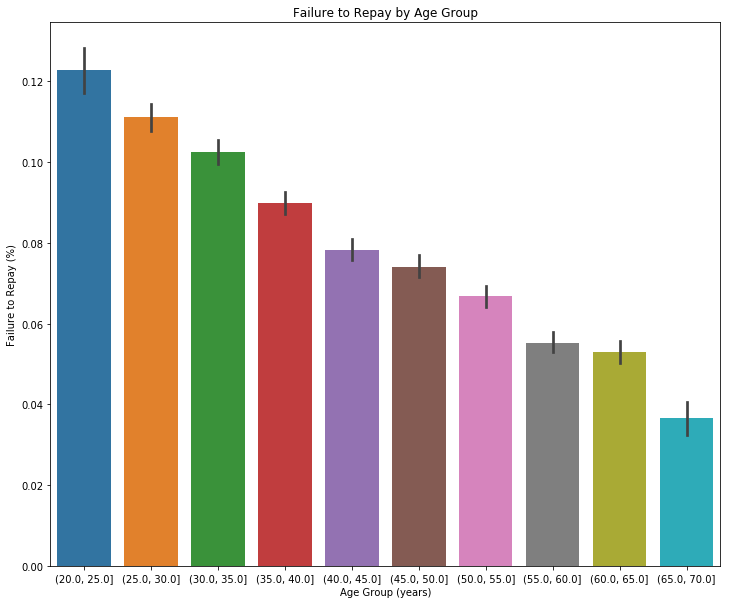

In [7]:
plt.figure(figsize=(12,10))
sns.barplot(app_train['YEAR_GROUP'], app_train['TARGET'])
plt.xlabel('Age Group (years)'); plt.ylabel('Failure to Repay (%)')
plt.title('Failure to Repay by Age Group')

In [8]:
app_train.select_dtypes('float64')

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_EMPLOYED,DAYS_REGISTRATION,OWN_CAR_AGE,CNT_FAM_MEMBERS,EXT_SOURCE_1,...,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,YEAR_BIRTH
0,202500.000,406597.5,24700.5,351000.0,0.018801,-637.0,-3648.0,NaN,1.0,0.083037,...,2.0,2.0,-1134.0,0.0,0.0,0.0,0.0,0.0,1.0,25.9
1,270000.000,1293502.5,35698.5,1129500.0,0.003541,-1188.0,-1186.0,NaN,2.0,0.311267,...,1.0,0.0,-828.0,0.0,0.0,0.0,0.0,0.0,0.0,45.9
2,67500.000,135000.0,6750.0,135000.0,0.010032,-225.0,-4260.0,26.0,1.0,NaN,...,0.0,0.0,-815.0,0.0,0.0,0.0,0.0,0.0,0.0,52.2
3,135000.000,312682.5,29686.5,297000.0,0.008019,-3039.0,-9833.0,NaN,2.0,NaN,...,2.0,0.0,-617.0,NaN,NaN,NaN,NaN,NaN,NaN,52.1
4,121500.000,513000.0,21865.5,513000.0,0.028663,-3038.0,-4311.0,NaN,1.0,NaN,...,0.0,0.0,-1106.0,0.0,0.0,0.0,0.0,0.0,0.0,54.6
5,99000.000,490495.5,27517.5,454500.0,0.035792,-1588.0,-4970.0,NaN,2.0,NaN,...,0.0,0.0,-2536.0,0.0,0.0,0.0,0.0,1.0,1.0,46.4
6,171000.000,1560726.0,41301.0,1395000.0,0.035792,-3130.0,-1213.0,17.0,3.0,0.774761,...,1.0,0.0,-1562.0,0.0,0.0,0.0,1.0,1.0,2.0,37.7
7,360000.000,1530000.0,42075.0,1530000.0,0.003122,-449.0,-4597.0,8.0,2.0,NaN,...,2.0,0.0,-1070.0,0.0,0.0,0.0,0.0,0.0,0.0,51.6
8,112500.000,1019610.0,33826.5,913500.0,0.018634,NaN,-7427.0,NaN,2.0,0.587334,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,55.1
9,135000.000,405000.0,20250.0,405000.0,0.019689,-2019.0,-14437.0,NaN,1.0,NaN,...,2.0,0.0,-1673.0,NaN,NaN,NaN,NaN,NaN,NaN,39.6


In [19]:
#觀察長時間沒換電話號碼的特性是否會影響成功還款與否
app_train['YEARS_LAST_PHONE_CHANGE'] = abs(round(app_train['DAYS_LAST_PHONE_CHANGE'] / 365, 1))
print("Before: ",app_train['YEARS_LAST_PHONE_CHANGE'].isnull().value_counts())
app_train['YEARS_LAST_PHONE_CHANGE'].dropna(inplace=True)
print("\nAfter: ",app_train['YEARS_LAST_PHONE_CHANGE'].isnull().value_counts())

app_train['YEARS_LAST_PHONE_CHANGE_GROUP'] = pd.qcut(app_train['YEARS_LAST_PHONE_CHANGE'], 6)
print("\nYEARS GROUP: ",app_train['YEARS_LAST_PHONE_CHANGE_GROUP'].isnull().value_counts())
np.corrcoef(app_train['YEARS_LAST_PHONE_CHANGE'], app_train['TARGET'])   #np.corrcoef無法接受nan, 但df.corr可

Before:  False    307510
True          1
Name: YEARS_LAST_PHONE_CHANGE, dtype: int64

After:  False    307510
Name: YEARS_LAST_PHONE_CHANGE, dtype: int64

YEARS GROUP:  False    307510
True          1
Name: YEARS_LAST_PHONE_CHANGE_GROUP, dtype: int64


array([[nan, nan],
       [nan,  1.]])

Text(0.5, 1.0, 'Failure to Repay by YEARS_LAST_PHONE_CHANGE_GROUP')

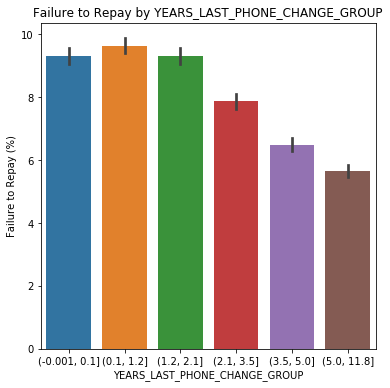

In [27]:
plt.figure(figsize=(6,6))
sns.barplot(app_train['YEARS_LAST_PHONE_CHANGE_GROUP'], app_train['TARGET'] * 100)
plt.xlabel('YEARS_LAST_PHONE_CHANGE_GROUP'); plt.ylabel('Failure to Repay (%)')
plt.title('Failure to Repay by YEARS_LAST_PHONE_CHANGE_GROUP')

In [22]:
app_train[['YEARS_LAST_PHONE_CHANGE','YEAR_BIRTH']].corr()

,YEARS_LAST_PHONE_CHANGE,YEAR_BIRTH
YEARS_LAST_PHONE_CHANGE,1.000000,0.082954
YEAR_BIRTH,0.082954,1.000000


In [23]:
app_train[['YEARS_LAST_PHONE_CHANGE','TARGET']].corr()

,YEARS_LAST_PHONE_CHANGE,TARGET
YEARS_LAST_PHONE_CHANGE,1.000000,-0.055192
TARGET,-0.055192,1.000000


In [30]:
app_train.groupby('YEARS_LAST_PHONE_CHANGE_GROUP')['TARGET'].mean()

YEARS_LAST_PHONE_CHANGE_GROUP
(-0.001, 0.1]    0.093149
(0.1, 1.2]       0.096476
(1.2, 2.1]       0.093046
(2.1, 3.5]       0.078769
(3.5, 5.0]       0.064865
(5.0, 11.8]      0.056625
Name: TARGET, dtype: float64